In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def euclidian_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [3]:
def knn_predict(X_train, y_train, X_tset, k):
    y_pred = []
    for test_point in X_test:
        distance = [euclidian_distance(test_point, train_point) for train_point in X_train]
        k_indices = np.argsort(distance)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = np.argmax(np.bincount(k_nearest_labels))
        y_pred.append(most_common)
    return y_pred

In [11]:
np.random.seed(30)
age = np.random.randint(20, 70, size=70)
smoke_per_week = np.random.randint(0, 30, size=70)
heartdisease = np.random.choice([0, 1], size=70)

In [14]:
test_age = np.random.randint(20, 70, size=10)
test_smoke = np.random.randint(0, 30, size=10)
test_disease = np.random.choice([0, 1], size=10)

In [15]:
X = np.column_stack((age, smoke_per_week))
y = heartdisease
A = np.column_stack((test_age, test_smoke))
B = test_disease

X_train = X[:70]
y_train = y[:70]
X_test = A[:10]
y_test = B[:10]

y_pred = knn_predict(X_train, y_train, X_test, k=7)
y_test = np.array(y_test)
y_pred = np.array(y_pred)

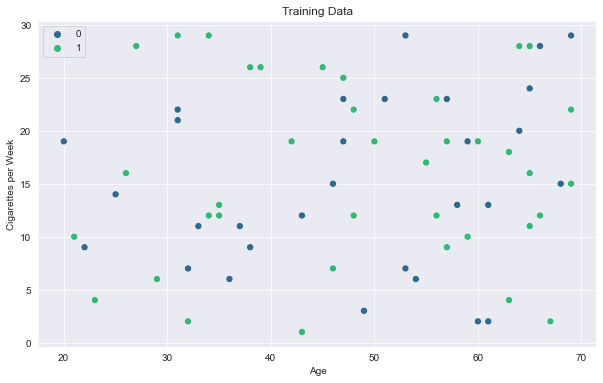

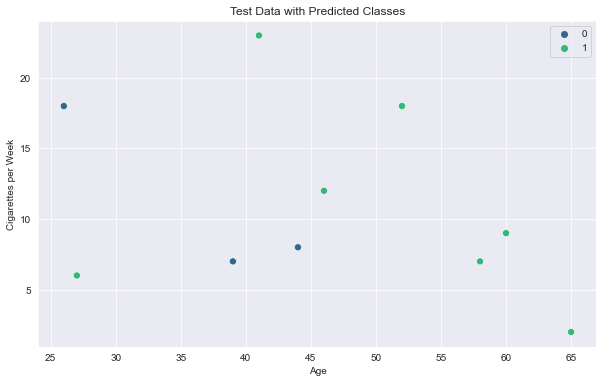

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='viridis', s=50)
plt.title('Training Data')
plt.xlabel('Age')
plt.ylabel('Cigarettes per Week')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='viridis', s=50)
plt.title('Test Data with Predicted Classes')
plt.xlabel('Age')
plt.ylabel('Cigarettes per Week')

plt.show()

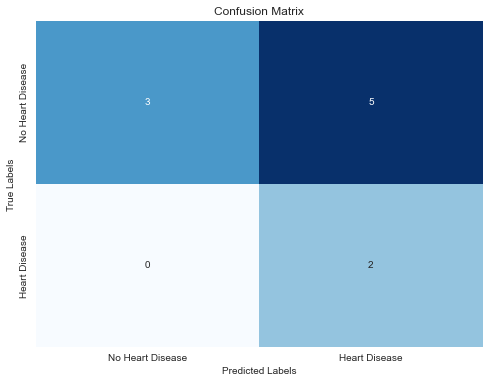

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
ax = plt.gca()

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['No Heart Disease', 'Heart Disease'])
ax.yaxis.set_ticklabels(['No Heart Disease', 'Heart Disease'])

plt.show()